# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_dataframe = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_dataframe}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16932,24",-5795,"9003,66","20140,9","20147,8","6,9","194,79",0
1,2,"20147,8",-5795,"8487,37","22840,17","22824,12","-16,05","51,05",0
2,3,"22824,12",-6285,"4549,79","21088,91","21147,56","58,65","78,96",0
3,4,"21147,56",-6085,"6664,97","21727,53","21782,08","54,55","88,64",0
4,5,"21782,08",-5950,"3939,69","19771,77","19772,17","0,4","188,2",0
...,...,...,...,...,...,...,...,...,...
995,996,"17751,65",-5940,"3360,0","15171,65","15219,44","47,79","-101,62",1
996,997,"15219,44",-6110,"4412,01","13521,45","13522,52","1,07","-153,6",1
997,998,"13522,52",-6235,"7069,05","14356,57","14257,47","-99,1","-289,6",1
998,999,"14257,47",-6190,"6181,85","14249,32","14242,17","-7,15","-280,19",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14034,89","-5705,0","7013,6","15343,49","15323,45","-20,04","228,67",0
1,2,"15323,45","-5970,0","7633,39","16986,84","16980,09","-6,75","138,05",0
2,3,"16980,09","-6250,0","4594,55","15324,64","15342,95","18,31","91,74",0
3,4,"15342,95","-6375,0","7716,89","16684,84","16706,73","21,89","36,45",0
4,5,"16706,73","-6020,0","7060,35","17747,08","17712,72","-34,36","101,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"2480,65","-5740,0","5618,89","2359,54","2424,72","65,18","115,61",1
996,997,"2424,72","-5725,0","6292,34","2992,06","2952,52","-39,54","66,08",1
997,998,"2952,52","-5377,62","2403,34","-21,76","8,21","29,97","58,91",1
998,999,"8,21","-5756,65","6559,47","811,03","872,06","61,03","81,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"10484,66","-5975,0","7217,79","11727,45","11882,71","155,26","381,21",0
1,2,"11882,71","-5850,0","7035,09","13067,8","13045,34","-22,46","344,85",0
2,3,"13045,34","-6140,0","3567,08","10472,42","10500,66","28,24","325,67",0
3,4,"10500,66","-6085,0","7441,43","11857,09","11819,52","-37,57","344,23",0
4,5,"11819,52","-6005,0","8124,72","13939,24","13815,32","-123,92","200,7",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,4","-0,0","0,0","3,4","2,76","-0,64","-20,06",1
996,997,"2,76","-0,0","0,0","2,76","9,57","6,81","-7,51",1
997,998,"9,57","-0,0","0,0","9,57","11,33","1,76","6,47",1
998,999,"11,33","-0,0","0,0","11,33","17,02","5,69","9,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17445,18","-5905,0","6012,94","17553,12","17533,44","-19,68","16,06",0
1,2,"17533,44","-6110,0","8506,7","19930,14","20021,08","90,94","102,33",0
2,3,"20021,08","-5930,0","4407,28","18498,36","18474,61","-23,75","162,19",0
3,4,"18474,61","-6080,0","8762,8","21157,41","21038,06","-119,35","-12,14",0
4,5,"21038,06","-6210,0","8428,75","23256,81","23192,92","-63,89","-100,6",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,86","-0,0","0,0","8,86","9,4","0,54","3,9",1
996,997,"9,4","-0,0","0,0","9,4","12,79","3,39","2,6",1
997,998,"12,79","-0,0","0,0","12,79","14,69","1,9","-0,82",1
998,999,"14,69","-0,0","0,0","14,69","9,11","-5,58","-12,74",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19617,1","-5720,0","6040,65","19937,75","19908,69","-29,06","287,97",0
1,2,"19908,69","-6040,0","9876,76","23745,45","23727,8","-17,65","238,88",0
2,3,"23727,8","-6040,0","6042,62","23730,42","23778,29","47,87","259,99",0
3,4,"23778,29","-5985,0","4048,45","21841,74","21813,92","-27,82","123,38",0
4,5,"21813,92","-6055,0","6875,76","22634,68","22664,82","30,14","231,15",0
...,...,...,...,...,...,...,...,...,...
995,996,"10,5","-0,0","0,0","10,5","23,41","12,91","9,18",1
996,997,"23,41","-0,0","0,0","23,41","0,69","-22,72","-2,91",1
997,998,"0,69","-0,0","0,0","0,69","6,88","6,19","3,32",1
998,999,"6,88","-0,0","0,0","6,88","7,0","0,12","0,49",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15362,61","-6205,0","4348,17","13505,78","13436,24","-69,54","259,9",0
1,2,"13436,24","-6255,0","8032,58","15213,82","15174,65","-39,17","233,42",0
2,3,"15174,65","-6115,0","7934,11","16993,76","17045,24","51,48","300,07",0
3,4,"17045,24","-6230,0","5962,78","16778,02","16826,91","48,89","330,23",0
4,5,"16826,91","-6165,0","8008,51","18670,42","18664,17","-6,25","293,53",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,33","-0,0","0,0","1,33","4,68","3,35","0,91",1
996,997,"4,68","-0,0","0,0","4,68","17,74","13,06","9,68",1
997,998,"17,74","-0,0","0,0","17,74","6,13","-11,61","5,23",1
998,999,"6,13","-0,0","0,0","6,13","1,95","-4,18","-10,78",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18314,68","-6260,0","8063,56","20118,24","20038,25","-79,99","513,51",0
1,2,"20038,25","-6220,0","7971,11","21789,36","21835,68","46,32","584,43",0
2,3,"21835,68","-6015,0","6930,57","22751,25","22777,51","26,26","444,01",0
3,4,"22777,51","-6350,0","7057,14","23484,65","23463,71","-20,94","418,39",0
4,5,"23463,71","-6020,0","3038,59","20482,3","20488,43","6,13","370,07",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,72","-0,0","0,0","8,72","5,98","-2,74","-1,9",1
996,997,"5,98","-0,0","0,0","5,98","1,84","-4,14","-13,72",1
997,998,"1,84","-0,0","0,0","1,84","26,5","24,66","14,7",1
998,999,"26,5","-0,0","0,0","26,5","4,1","-22,4","0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22077,61","-5970,0","6828,13","22935,74","22971,89","36,15","178,6",0
1,2,"22971,89","-5755,0","6175,66","23392,55","23484,62","92,07","359,98",0
2,3,"23484,62","-6535,0","3077,86","20027,48","19999,01","-28,47","263,86",0
3,4,"19999,01","-6200,0","6826,3","20625,31","20794,18","168,87","399,1",0
4,5,"20794,18","-6210,0","6969,64","21553,82","21576,57","22,75","361,17",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,38","-0,0","0,0","2,38","6,16","3,78","-3,88",1
996,997,"6,16","-0,0","0,0","6,16","6,86","0,7","1,93",1
997,998,"6,86","-0,0","0,0","6,86","6,02","-0,84","2,2",1
998,999,"6,02","-0,0","0,0","6,02","3,71","-2,31","1,75",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19032,43","-6180,0","4120,62","16973,05","17009,11","36,06","371,14",0
1,2,"17009,11","-5765,0","10915,99","22160,1","22090,78","-69,32","316,41",0
2,3,"22090,78","-5980,0","5959,22","22070,0","22134,09","64,09","387,64",0
3,4,"22134,09","-5830,0","6860,39","23164,48","23278,27","113,79","408,51",0
4,5,"23278,27","-5905,0","3037,8","20411,07","20388,6","-22,47","364,77",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,2","-0,0","0,0","12,2","7,37","-4,83","-15,92",1
996,997,"7,37","-0,0","0,0","7,37","5,59","-1,78","-6,97",1
997,998,"5,59","-0,0","0,0","5,59","11,02","5,43","0,8",1
998,999,"11,02","-0,0","0,0","11,02","6,54","-4,48","-11,65",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17175,65","-6040,0","11136,86","22272,51","22101,01","-171,5","117,87",0
1,2,"22101,01","-6095,0","7811,38","23817,39","23841,55","24,16","80,96",0
2,3,"23841,55","-5795,0","5900,6","23947,15","23854,38","-92,77","-48,54",0
3,4,"23854,38","-6225,0","5615,01","23244,39","23242,13","-2,26","-163,52",0
4,5,"23242,13","-6135,0","5285,63","22392,76","22344,19","-48,57","-203,4",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,35","-0,0","0,0","9,35","4,28","-5,07","-4,11",1
996,997,"4,28","-0,0","0,0","4,28","30,52","26,24","27,38",1
997,998,"30,52","-0,0","0,0","30,52","0,69","-29,83","-3,62",1
998,999,"0,69","-0,0","0,0","0,69","17,12","16,43","10,75",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,65","-6055,0","6215,36","22304,01","22242,32","-61,69","34,11",0
1,2,"22242,32","-5940,0","6691,65","22993,97","22983,66","-10,31","42,41",0
2,3,"22983,66","-5885,0","6130,98","23229,64","23301,88","72,24","58,48",0
3,4,"23301,88","-6030,0","5035,77","22307,65","22270,88","-36,77","25,47",0
4,5,"22270,88","-6005,0","6518,15","22784,03","22794,42","10,39","13,96",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,74","-0,0","0,0","2,74","3,88","1,14","3,0",1
996,997,"3,88","-0,0","0,0","3,88","0,72","-3,16","-2,72",1
997,998,"0,72","-0,0","0,0","0,72","1,13","0,41","-11,02",1
998,999,"1,13","-0,0","0,0","1,13","2,14","1,01","-19,34",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"15886,17","-5900,0","5970,3","15956,47","15980,01","23,54","68,46",0
1,2,"15980,01","-5810,0","6050,74","16220,75","16175,65","-45,1","8,64",0
2,3,"16175,65","-5760,0","5917,51","16333,16","16413,96","80,8","17,3",0
3,4,"16413,96","-5970,0","6982,8","17426,76","17460,02","33,26","68,23",0
4,5,"17460,02","-6340,0","7929,64","19049,66","19111,41","61,75","52,84",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,52","-0,0","0,0","5,52","0,47","-5,05","-4,84",1
996,997,"0,47","-0,0","0,0","0,47","5,79","5,32","0,68",1
997,998,"5,79","-0,0","0,0","5,79","14,14","8,35","-0,25",1
998,999,"14,14","-0,0","0,0","14,14","4,73","-9,41","2,66",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23056,29","-5975,0","3639,31","20720,6","20716,68","-3,92","334,01",0
1,2,"20716,68","-6150,0","7008,88","21575,56","21681,55","105,99","352,59",0
2,3,"21681,55","-6030,0","6463,74","22115,29","22138,84","23,55","354,54",0
3,4,"22138,84","-6330,0","4019,4","19828,24","19807,63","-20,61","339,9",0
4,5,"19807,63","-6315,0","10039,4","23532,03","23487,69","-44,34","121,91",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,75","-0,0","0,0","1,75","13,26","11,51","10,31",1
996,997,"13,26","-0,0","0,0","13,26","4,6","-8,66","-5,13",1
997,998,"4,6","-0,0","0,0","4,6","9,65","5,05","6,75",1
998,999,"9,65","-0,0","0,0","9,65","6,1","-3,55","-3,36",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22682,46","-5995,0","5831,75","22519,21","22535,33","16,12","459,1",0
1,2,"22535,33","-5975,0","3507,95","20068,28","20135,89","67,61","514,24",0
2,3,"20135,89","-6250,0","8020,71","21906,6","21854,08","-52,52","421,71",0
3,4,"21854,08","-5985,0","8129,34","23998,42","23900,39","-98,03","282,93",0
4,5,"23900,39","-6030,0","5690,89","23561,28","23581,5","20,22","287,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"6,96","-0,0","0,0","6,96","3,42","-3,54","-0,25",1
996,997,"3,42","-0,0","0,0","3,42","18,91","15,49","16,44",1
997,998,"18,91","-0,0","0,0","18,91","16,72","-2,19","9,09",1
998,999,"16,72","-0,0","0,0","16,72","1,44","-15,28","-0,25",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22379,58","-5785,0","5690,39","22284,97","22319,5","34,53","144,59",0
1,2,"22319,5","-5980,0","6499,32","22838,82","22799,39","-39,43","171,58",0
2,3,"22799,39","-6000,0","6305,86","23105,25","23145,46","40,21","213,48",0
3,4,"23145,46","-6095,0","5814,71","22865,17","22845,93","-19,24","195,21",0
4,5,"22845,93","-6145,0","6270,76","22971,69","22978,1","6,41","290,05",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,71","-0,0","0,0","2,71","2,61","-0,1","-0,48",1
996,997,"2,61","-0,0","0,0","2,61","5,93","3,32","1,85",1
997,998,"5,93","-0,0","0,0","5,93","13,8","7,87","5,27",1
998,999,"13,8","-0,0","0,0","13,8","6,1","-7,7","-0,73",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20247,25",-5580,"6051,35","20718,6","20679,11","-39,49","-2,21",0
1,2,"20679,11",-6195,"7936,54","22420,65","22497,6","76,95","164,76",0
2,3,"22497,6",-6165,"5995,68","22328,28","22284,53","-43,75","73,79",0
3,4,"22284,53",-5720,"5031,76","21596,29","21654,39","58,1","181,92",0
4,5,"21654,39",-6075,"9124,56","24703,95","24903,47","199,52","323,61",0
...,...,...,...,...,...,...,...,...,...
995,996,"14567,32",-5990,"6995,54","15572,86","15611,86","39,0","-8,11",1
996,997,"15611,86",-6405,"6226,8","15433,66","15483,99","50,33","14,33",1
997,998,"15483,99",-5670,"5799,07","15613,06","15537,81","-75,25","6,19",1
998,999,"15537,81",-6130,"5099,01","14506,82","14515,34","8,52","84,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"12858,53","-6005,0","6028,71","12882,24","12839,43","-42,81","67,14",0
1,2,"12839,43","-5925,0","7060,68","13975,11","13920,05","-55,06","3,95",0
2,3,"13920,05","-6450,0","11910,17","19380,22","19446,63","66,41","-28,04",0
3,4,"19446,63","-6495,0","7059,14","20010,77","19951,08","-59,69","-92,41",0
4,5,"19951,08","-6300,0","7021,46","20672,54","20708,94","36,4","-130,33",0
...,...,...,...,...,...,...,...,...,...
995,996,"3854,5","-5960,0","5534,05","3428,55","3355,21","-73,34","-305,54",1
996,997,"3355,21","-6370,0","6329,75","3314,96","3330,31","15,35","-300,52",1
997,998,"3330,31","-5760,0","2905,72","476,03","483,45","7,42","-273,07",1
998,999,"483,45","-5412,11","8221,51","3292,85","3340,43","47,58","-195,76",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,22","-5810,0","7001,2","23334,42","23347,02","12,6","-90,27",0
1,2,"23347,02","-6240,0","7270,93","24377,95","24283,54","-94,41","-105,27",0
2,3,"24283,54","-6430,0","3650,03","21503,57","21510,13","6,56","-17,7",0
3,4,"21510,13","-5850,0","6940,97","22601,1","22644,04","42,94","27,91",0
4,5,"22644,04","-6025,0","5910,84","22529,88","22565,92","36,04","80,35",0
...,...,...,...,...,...,...,...,...,...
995,996,"20,99","-0,0","0,0","20,99","7,38","-13,61","5,7",1
996,997,"7,38","-0,0","0,0","7,38","2,99","-4,39","-5,43",1
997,998,"2,99","-0,0","0,0","2,99","14,37","11,38","9,91",1
998,999,"14,37","-0,0","0,0","14,37","23,46","9,09","10,89",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21287,51","-6070,0","7042,91","22260,42","22216,71","-43,71","188,2",0
1,2,"22216,71","-6065,0","4682,57","20834,28","20856,74","22,46","259,79",0
2,3,"20856,74","-6035,0","7234,09","22055,83","22134,3","78,47","272,27",0
3,4,"22134,3","-6120,0","5847,84","21862,14","22001,79","139,65","380,74",0
4,5,"22001,79","-5605,0","3757,23","20154,02","20186,77","32,75","279,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,31","-0,0","0,0","3,31","4,22","0,91","-5,75",1
996,997,"4,22","-0,0","0,0","4,22","14,3","10,08","7,99",1
997,998,"14,3","-0,0","0,0","14,3","12,66","-1,64","10,33",1
998,999,"12,66","-0,0","0,0","12,66","2,96","-9,7","-1,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21372,17","-5985,0","7788,9","23176,07","23214,64","38,57","19,95",0
1,2,"23214,64","-5765,0","2969,27","20418,91","20415,11","-3,8","61,14",0
2,3,"20415,11","-6325,0","7390,24","21480,35","21602,29","121,94","144,09",0
3,4,"21602,29","-6190,0","7315,88","22728,17","22691,65","-36,52","217,46",0
4,5,"22691,65","-5690,0","6031,24","23032,89","22983,03","-49,86","170,15",0
...,...,...,...,...,...,...,...,...,...
995,996,"17,19","-0,0","0,0","17,19","26,77","9,58","23,15",1
996,997,"26,77","-0,0","0,0","26,77","11,55","-15,22","10,12",1
997,998,"11,55","-0,0","0,0","11,55","1,45","-10,1","-1,74",1
998,999,"1,45","-0,0","0,0","1,45","8,2","6,75","5,73",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19135,24","-6080,0","4856,82","17912,06","17932,53","20,47","46,88",0
1,2,"17932,53","-6125,0","5021,72","16829,25","16928,49","99,24","199,92",0
2,3,"16928,49","-5955,0","5972,53","16946,02","16951,13","5,11","186,83",0
3,4,"16951,13","-6190,0","6887,91","17649,04","17681,42","32,38","209,1",0
4,5,"17681,42","-6340,0","4566,61","15908,03","15977,96","69,93","237,46",0
...,...,...,...,...,...,...,...,...,...
995,996,"7,1","-0,0","0,0","7,1","3,53","-3,57","-12,95",1
996,997,"3,53","-0,0","0,0","3,53","20,64","17,11","10,14",1
997,998,"20,64","-0,0","0,0","20,64","0,62","-20,02","-13,66",1
998,999,"0,62","-0,0","0,0","0,62","10,69","10,07","7,64",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18494,78","-5950,0","5851,14","18395,92","18412,17","16,25","-84,69",0
1,2,"18412,17","-5865,0","7995,46","20542,63","20528,85","-13,78","-47,21",0
2,3,"20528,85","-5790,0","4036,02","18774,87","18860,58","85,71","88,97",0
3,4,"18860,58","-5940,0","6598,52","19519,1","19574,23","55,13","90,85",0
4,5,"19574,23","-6155,0","6263,71","19682,94","19663,56","-19,38","86,63",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,01","-0,0","0,0","2,01","16,22","14,21","7,36",1
996,997,"16,22","-0,0","0,0","16,22","10,86","-5,36","3,14",1
997,998,"10,86","-0,0","0,0","10,86","19,86","9,0","8,27",1
998,999,"19,86","-0,0","0,0","19,86","12,29","-7,57","12,21",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20243,13","-5965,0","7985,87","22264,0","22278,4","14,4","181,64",0
1,2,"22278,4","-6175,0","6863,82","22967,22","22984,84","17,62","158,55",0
2,3,"22984,84","-6185,0","6517,27","23317,11","23354,87","37,76","255,01",0
3,4,"23354,87","-5855,0","5209,27","22709,14","22651,18","-57,96","184,76",0
4,5,"22651,18","-5890,0","6124,91","22886,09","22981,27","95,18","194,59",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,77","-0,0","0,0","1,77","2,07","0,3","-2,85",1
996,997,"2,07","-0,0","0,0","2,07","10,87","8,8","-1,72",1
997,998,"10,87","-0,0","0,0","10,87","7,09","-3,78","-0,4",1
998,999,"7,09","-0,0","0,0","7,09","19,21","12,12","14,47",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19151,05","-6045,0","8896,55","22002,6","21974,5","-28,1","120,43",0
1,2,"21974,5","-5930,0","6101,08","22145,58","22156,07","10,49","149,98",0
2,3,"22156,07","-6135,0","6928,27","22949,34","23027,33","77,99","287,24",0
3,4,"23027,33","-6425,0","6577,84","23180,17","23134,57","-45,6","218,43",0
4,5,"23134,57","-6145,0","3432,57","20422,14","20397,11","-25,03","265,81",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,27","-0,0","0,0","0,27","9,29","9,02","-1,34",1
996,997,"9,29","-0,0","0,0","9,29","8,73","-0,56","-7,47",1
997,998,"8,73","-0,0","0,0","8,73","13,92","5,19","9,26",1
998,999,"13,92","-0,0","0,0","13,92","24,99","11,07","18,55",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21913,89","-5945,0","7515,72","23484,61","23445,77","-38,84","316,53",0
1,2,"23445,77","-6015,0","6155,06","23585,83","23611,02","25,19","367,02",0
2,3,"23611,02","-6270,0","5967,41","23308,43","23317,8","9,37","340,51",0
3,4,"23317,8","-5930,0","6661,08","24048,88","24071,63","22,75","432,97",0
4,5,"24071,63","-5995,0","6288,14","24364,77","24288,65","-76,12","261,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,8","-0,0","0,0","2,8","6,51","3,71","-6,47",1
996,997,"6,51","-0,0","0,0","6,51","2,55","-3,96","-1,8",1
997,998,"2,55","-0,0","0,0","2,55","14,83","12,28","12,92",1
998,999,"14,83","-0,0","0,0","14,83","1,26","-13,57","-0,92",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21317,46","-5990,0","2968,12","18295,58","18323,64","28,06","-82,57",0
1,2,"18323,64","-6255,0","6219,19","18287,83","18284,2","-3,63","-120,57",0
2,3,"18284,2","-5830,0","5794,24","18248,44","18235,2","-13,24","18,69",0
3,4,"18235,2","-5855,0","6994,57","19374,77","19380,49","5,72","13,79",0
4,5,"19380,49","-6320,0","6978,26","20038,75","20051,59","12,84","35,39",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,53","-0,0","0,0","4,53","4,38","-0,15","-0,18",1
996,997,"4,38","-0,0","0,0","4,38","21,36","16,98","10,55",1
997,998,"21,36","-0,0","0,0","21,36","15,47","-5,89","6,24",1
998,999,"15,47","-0,0","0,0","15,47","11,43","-4,04","11,26",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18248,42","-5890,0","7012,33","19370,75","19378,62","7,87","-61,1",0
1,2,"19378,62","-5950,0","6942,62","20371,24","20411,72","40,48","-16,9",0
2,3,"20411,72","-6070,0","6945,78","21287,5","21339,7","52,2","125,63",0
3,4,"21339,7","-5970,0","7011,03","22380,73","22385,01","4,28","200,94",0
4,5,"22385,01","-5705,0","5155,21","21835,22","21881,27","46,05","298,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,16","-0,0","0,0","12,16","1,45","-10,71","-7,61",1
996,997,"1,45","-0,0","0,0","1,45","5,94","4,49","3,09",1
997,998,"5,94","-0,0","0,0","5,94","8,7","2,76","-1,52",1
998,999,"8,7","-0,0","0,0","8,7","4,53","-4,17","-1,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19999,39","-5905,0","6970,79","21065,18","21102,9","37,72","109,13",0
1,2,"21102,9","-6155,0","6060,28","21008,18","20966,69","-41,49","59,33",0
2,3,"20966,69","-5975,0","2934,69","17926,38","17990,19","63,81","85,1",0
3,4,"17990,19","-6305,0","6950,94","18636,13","18679,74","43,61","127,56",0
4,5,"18679,74","-5940,0","7943,2","20682,94","20731,84","48,9","178,79",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,73","-0,0","0,0","5,73","3,13","-2,6","-19,24",1
996,997,"3,13","-0,0","0,0","3,13","3,87","0,74","-3,1",1
997,998,"3,87","-0,0","0,0","3,87","5,88","2,01","5,53",1
998,999,"5,88","-0,0","0,0","5,88","2,22","-3,66","-1,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17698,38","-5710,0","4618,64","16607,02","16580,51","-26,51","35,66",0
1,2,"16580,51","-5875,0","6004,3","16709,81","16702,31","-7,5","58,61",0
2,3,"16702,31","-6250,0","8001,28","18453,59","18456,14","2,55","-9,07",0
3,4,"18456,14","-5870,0","6931,83","19517,97","19595,08","77,11","-16,24",0
4,5,"19595,08","-6330,0","7449,42","20714,5","20644,03","-70,47","-108,89",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,11","-0,0","0,0","1,11","1,53","0,42","-12,95",1
996,997,"1,53","-0,0","0,0","1,53","5,18","3,65","0,97",1
997,998,"5,18","-0,0","0,0","5,18","9,61","4,43","9,4",1
998,999,"9,61","-0,0","0,0","9,61","13,39","3,78","3,06",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"11544,4","-5565,0","7069,47","13048,87","12982,38","-66,49","118,8",0
1,2,"12982,38","-6155,0","6953,56","13780,94","13840,48","59,54","124,42",0
2,3,"13840,48","-6005,0","8211,32","16046,8","15937,63","-109,17","-18,99",0
3,4,"15937,63","-5915,0","8550,06","18572,69","18595,78","23,09","76,99",0
4,5,"18595,78","-5830,0","6389,87","19155,65","19072,47","-83,18","-24,06",0
...,...,...,...,...,...,...,...,...,...
995,996,"16,15","-0,0","0,0","16,15","6,29","-9,86","-11,87",1
996,997,"6,29","-0,0","0,0","6,29","14,36","8,07","4,38",1
997,998,"14,36","-0,0","0,0","14,36","2,38","-11,98","-20,25",1
998,999,"2,38","-0,0","0,0","2,38","4,75","2,37","-6,32",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16932.24,-5795,9003.66,20140.90,20147.80,6.90,194.79,0
1,2,20147.80,-5795,8487.37,22840.17,22824.12,-16.05,51.05,0
2,3,22824.12,-6285,4549.79,21088.91,21147.56,58.65,78.96,0
3,4,21147.56,-6085,6664.97,21727.53,21782.08,54.55,88.64,0
4,5,21782.08,-5950,3939.69,19771.77,19772.17,0.40,188.20,0
...,...,...,...,...,...,...,...,...,...
995,996,17751.65,-5940,3360.00,15171.65,15219.44,47.79,-101.62,1
996,997,15219.44,-6110,4412.01,13521.45,13522.52,1.07,-153.60,1
997,998,13522.52,-6235,7069.05,14356.57,14257.47,-99.10,-289.60,1
998,999,14257.47,-6190,6181.85,14249.32,14242.17,-7.15,-280.19,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14034.89,"-5705,0",7013.60,15343.49,15323.45,-20.04,228.67,0
1,2,15323.45,"-5970,0",7633.39,16986.84,16980.09,-6.75,138.05,0
2,3,16980.09,"-6250,0",4594.55,15324.64,15342.95,18.31,91.74,0
3,4,15342.95,"-6375,0",7716.89,16684.84,16706.73,21.89,36.45,0
4,5,16706.73,"-6020,0",7060.35,17747.08,17712.72,-34.36,101.33,0
...,...,...,...,...,...,...,...,...,...
995,996,2480.65,"-5740,0",5618.89,2359.54,2424.72,65.18,115.61,1
996,997,2424.72,"-5725,0",6292.34,2992.06,2952.52,-39.54,66.08,1
997,998,2952.52,"-5377,62",2403.34,-21.76,8.21,29.97,58.91,1
998,999,8.21,"-5756,65",6559.47,811.03,872.06,61.03,81.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,10484.66,"-5975,0",7217.79,11727.45,11882.71,155.26,381.21,0
1,2,11882.71,"-5850,0",7035.09,13067.80,13045.34,-22.46,344.85,0
2,3,13045.34,"-6140,0",3567.08,10472.42,10500.66,28.24,325.67,0
3,4,10500.66,"-6085,0",7441.43,11857.09,11819.52,-37.57,344.23,0
4,5,11819.52,"-6005,0",8124.72,13939.24,13815.32,-123.92,200.70,0
...,...,...,...,...,...,...,...,...,...
995,996,3.40,"-0,0",0.00,3.40,2.76,-0.64,-20.06,1
996,997,2.76,"-0,0",0.00,2.76,9.57,6.81,-7.51,1
997,998,9.57,"-0,0",0.00,9.57,11.33,1.76,6.47,1
998,999,11.33,"-0,0",0.00,11.33,17.02,5.69,9.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17445.18,"-5905,0",6012.94,17553.12,17533.44,-19.68,16.06,0
1,2,17533.44,"-6110,0",8506.70,19930.14,20021.08,90.94,102.33,0
2,3,20021.08,"-5930,0",4407.28,18498.36,18474.61,-23.75,162.19,0
3,4,18474.61,"-6080,0",8762.80,21157.41,21038.06,-119.35,-12.14,0
4,5,21038.06,"-6210,0",8428.75,23256.81,23192.92,-63.89,-100.60,0
...,...,...,...,...,...,...,...,...,...
995,996,8.86,"-0,0",0.00,8.86,9.40,0.54,3.90,1
996,997,9.40,"-0,0",0.00,9.40,12.79,3.39,2.60,1
997,998,12.79,"-0,0",0.00,12.79,14.69,1.90,-0.82,1
998,999,14.69,"-0,0",0.00,14.69,9.11,-5.58,-12.74,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19617.10,"-5720,0",6040.65,19937.75,19908.69,-29.06,287.97,0
1,2,19908.69,"-6040,0",9876.76,23745.45,23727.80,-17.65,238.88,0
2,3,23727.80,"-6040,0",6042.62,23730.42,23778.29,47.87,259.99,0
3,4,23778.29,"-5985,0",4048.45,21841.74,21813.92,-27.82,123.38,0
4,5,21813.92,"-6055,0",6875.76,22634.68,22664.82,30.14,231.15,0
...,...,...,...,...,...,...,...,...,...
995,996,10.50,"-0,0",0.00,10.50,23.41,12.91,9.18,1
996,997,23.41,"-0,0",0.00,23.41,0.69,-22.72,-2.91,1
997,998,0.69,"-0,0",0.00,0.69,6.88,6.19,3.32,1
998,999,6.88,"-0,0",0.00,6.88,7.00,0.12,0.49,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15362.61,"-6205,0",4348.17,13505.78,13436.24,-69.54,259.90,0
1,2,13436.24,"-6255,0",8032.58,15213.82,15174.65,-39.17,233.42,0
2,3,15174.65,"-6115,0",7934.11,16993.76,17045.24,51.48,300.07,0
3,4,17045.24,"-6230,0",5962.78,16778.02,16826.91,48.89,330.23,0
4,5,16826.91,"-6165,0",8008.51,18670.42,18664.17,-6.25,293.53,0
...,...,...,...,...,...,...,...,...,...
995,996,1.33,"-0,0",0.00,1.33,4.68,3.35,0.91,1
996,997,4.68,"-0,0",0.00,4.68,17.74,13.06,9.68,1
997,998,17.74,"-0,0",0.00,17.74,6.13,-11.61,5.23,1
998,999,6.13,"-0,0",0.00,6.13,1.95,-4.18,-10.78,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18314.68,"-6260,0",8063.56,20118.24,20038.25,-79.99,513.51,0
1,2,20038.25,"-6220,0",7971.11,21789.36,21835.68,46.32,584.43,0
2,3,21835.68,"-6015,0",6930.57,22751.25,22777.51,26.26,444.01,0
3,4,22777.51,"-6350,0",7057.14,23484.65,23463.71,-20.94,418.39,0
4,5,23463.71,"-6020,0",3038.59,20482.30,20488.43,6.13,370.07,0
...,...,...,...,...,...,...,...,...,...
995,996,8.72,"-0,0",0.00,8.72,5.98,-2.74,-1.90,1
996,997,5.98,"-0,0",0.00,5.98,1.84,-4.14,-13.72,1
997,998,1.84,"-0,0",0.00,1.84,26.50,24.66,14.70,1
998,999,26.50,"-0,0",0.00,26.50,4.10,-22.40,0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22077.61,"-5970,0",6828.13,22935.74,22971.89,36.15,178.60,0
1,2,22971.89,"-5755,0",6175.66,23392.55,23484.62,92.07,359.98,0
2,3,23484.62,"-6535,0",3077.86,20027.48,19999.01,-28.47,263.86,0
3,4,19999.01,"-6200,0",6826.30,20625.31,20794.18,168.87,399.10,0
4,5,20794.18,"-6210,0",6969.64,21553.82,21576.57,22.75,361.17,0
...,...,...,...,...,...,...,...,...,...
995,996,2.38,"-0,0",0.00,2.38,6.16,3.78,-3.88,1
996,997,6.16,"-0,0",0.00,6.16,6.86,0.70,1.93,1
997,998,6.86,"-0,0",0.00,6.86,6.02,-0.84,2.20,1
998,999,6.02,"-0,0",0.00,6.02,3.71,-2.31,1.75,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19032.43,"-6180,0",4120.62,16973.05,17009.11,36.06,371.14,0
1,2,17009.11,"-5765,0",10915.99,22160.10,22090.78,-69.32,316.41,0
2,3,22090.78,"-5980,0",5959.22,22070.00,22134.09,64.09,387.64,0
3,4,22134.09,"-5830,0",6860.39,23164.48,23278.27,113.79,408.51,0
4,5,23278.27,"-5905,0",3037.80,20411.07,20388.60,-22.47,364.77,0
...,...,...,...,...,...,...,...,...,...
995,996,12.20,"-0,0",0.00,12.20,7.37,-4.83,-15.92,1
996,997,7.37,"-0,0",0.00,7.37,5.59,-1.78,-6.97,1
997,998,5.59,"-0,0",0.00,5.59,11.02,5.43,0.80,1
998,999,11.02,"-0,0",0.00,11.02,6.54,-4.48,-11.65,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17175.65,"-6040,0",11136.86,22272.51,22101.01,-171.50,117.87,0
1,2,22101.01,"-6095,0",7811.38,23817.39,23841.55,24.16,80.96,0
2,3,23841.55,"-5795,0",5900.60,23947.15,23854.38,-92.77,-48.54,0
3,4,23854.38,"-6225,0",5615.01,23244.39,23242.13,-2.26,-163.52,0
4,5,23242.13,"-6135,0",5285.63,22392.76,22344.19,-48.57,-203.40,0
...,...,...,...,...,...,...,...,...,...
995,996,9.35,"-0,0",0.00,9.35,4.28,-5.07,-4.11,1
996,997,4.28,"-0,0",0.00,4.28,30.52,26.24,27.38,1
997,998,30.52,"-0,0",0.00,30.52,0.69,-29.83,-3.62,1
998,999,0.69,"-0,0",0.00,0.69,17.12,16.43,10.75,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.65,"-6055,0",6215.36,22304.01,22242.32,-61.69,34.11,0
1,2,22242.32,"-5940,0",6691.65,22993.97,22983.66,-10.31,42.41,0
2,3,22983.66,"-5885,0",6130.98,23229.64,23301.88,72.24,58.48,0
3,4,23301.88,"-6030,0",5035.77,22307.65,22270.88,-36.77,25.47,0
4,5,22270.88,"-6005,0",6518.15,22784.03,22794.42,10.39,13.96,0
...,...,...,...,...,...,...,...,...,...
995,996,2.74,"-0,0",0.00,2.74,3.88,1.14,3.00,1
996,997,3.88,"-0,0",0.00,3.88,0.72,-3.16,-2.72,1
997,998,0.72,"-0,0",0.00,0.72,1.13,0.41,-11.02,1
998,999,1.13,"-0,0",0.00,1.13,2.14,1.01,-19.34,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,15886.17,"-5900,0",5970.30,15956.47,15980.01,23.54,68.46,0
1,2,15980.01,"-5810,0",6050.74,16220.75,16175.65,-45.10,8.64,0
2,3,16175.65,"-5760,0",5917.51,16333.16,16413.96,80.80,17.30,0
3,4,16413.96,"-5970,0",6982.80,17426.76,17460.02,33.26,68.23,0
4,5,17460.02,"-6340,0",7929.64,19049.66,19111.41,61.75,52.84,0
...,...,...,...,...,...,...,...,...,...
995,996,5.52,"-0,0",0.00,5.52,0.47,-5.05,-4.84,1
996,997,0.47,"-0,0",0.00,0.47,5.79,5.32,0.68,1
997,998,5.79,"-0,0",0.00,5.79,14.14,8.35,-0.25,1
998,999,14.14,"-0,0",0.00,14.14,4.73,-9.41,2.66,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23056.29,"-5975,0",3639.31,20720.60,20716.68,-3.92,334.01,0
1,2,20716.68,"-6150,0",7008.88,21575.56,21681.55,105.99,352.59,0
2,3,21681.55,"-6030,0",6463.74,22115.29,22138.84,23.55,354.54,0
3,4,22138.84,"-6330,0",4019.40,19828.24,19807.63,-20.61,339.90,0
4,5,19807.63,"-6315,0",10039.40,23532.03,23487.69,-44.34,121.91,0
...,...,...,...,...,...,...,...,...,...
995,996,1.75,"-0,0",0.00,1.75,13.26,11.51,10.31,1
996,997,13.26,"-0,0",0.00,13.26,4.60,-8.66,-5.13,1
997,998,4.60,"-0,0",0.00,4.60,9.65,5.05,6.75,1
998,999,9.65,"-0,0",0.00,9.65,6.10,-3.55,-3.36,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22682.46,"-5995,0",5831.75,22519.21,22535.33,16.12,459.10,0
1,2,22535.33,"-5975,0",3507.95,20068.28,20135.89,67.61,514.24,0
2,3,20135.89,"-6250,0",8020.71,21906.60,21854.08,-52.52,421.71,0
3,4,21854.08,"-5985,0",8129.34,23998.42,23900.39,-98.03,282.93,0
4,5,23900.39,"-6030,0",5690.89,23561.28,23581.50,20.22,287.66,0
...,...,...,...,...,...,...,...,...,...
995,996,6.96,"-0,0",0.00,6.96,3.42,-3.54,-0.25,1
996,997,3.42,"-0,0",0.00,3.42,18.91,15.49,16.44,1
997,998,18.91,"-0,0",0.00,18.91,16.72,-2.19,9.09,1
998,999,16.72,"-0,0",0.00,16.72,1.44,-15.28,-0.25,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22379.58,"-5785,0",5690.39,22284.97,22319.50,34.53,144.59,0
1,2,22319.50,"-5980,0",6499.32,22838.82,22799.39,-39.43,171.58,0
2,3,22799.39,"-6000,0",6305.86,23105.25,23145.46,40.21,213.48,0
3,4,23145.46,"-6095,0",5814.71,22865.17,22845.93,-19.24,195.21,0
4,5,22845.93,"-6145,0",6270.76,22971.69,22978.10,6.41,290.05,0
...,...,...,...,...,...,...,...,...,...
995,996,2.71,"-0,0",0.00,2.71,2.61,-0.10,-0.48,1
996,997,2.61,"-0,0",0.00,2.61,5.93,3.32,1.85,1
997,998,5.93,"-0,0",0.00,5.93,13.80,7.87,5.27,1
998,999,13.80,"-0,0",0.00,13.80,6.10,-7.70,-0.73,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20247.25,-5580,6051.35,20718.60,20679.11,-39.49,-2.21,0
1,2,20679.11,-6195,7936.54,22420.65,22497.60,76.95,164.76,0
2,3,22497.60,-6165,5995.68,22328.28,22284.53,-43.75,73.79,0
3,4,22284.53,-5720,5031.76,21596.29,21654.39,58.10,181.92,0
4,5,21654.39,-6075,9124.56,24703.95,24903.47,199.52,323.61,0
...,...,...,...,...,...,...,...,...,...
995,996,14567.32,-5990,6995.54,15572.86,15611.86,39.00,-8.11,1
996,997,15611.86,-6405,6226.80,15433.66,15483.99,50.33,14.33,1
997,998,15483.99,-5670,5799.07,15613.06,15537.81,-75.25,6.19,1
998,999,15537.81,-6130,5099.01,14506.82,14515.34,8.52,84.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,12858.53,"-6005,0",6028.71,12882.24,12839.43,-42.81,67.14,0
1,2,12839.43,"-5925,0",7060.68,13975.11,13920.05,-55.06,3.95,0
2,3,13920.05,"-6450,0",11910.17,19380.22,19446.63,66.41,-28.04,0
3,4,19446.63,"-6495,0",7059.14,20010.77,19951.08,-59.69,-92.41,0
4,5,19951.08,"-6300,0",7021.46,20672.54,20708.94,36.40,-130.33,0
...,...,...,...,...,...,...,...,...,...
995,996,3854.50,"-5960,0",5534.05,3428.55,3355.21,-73.34,-305.54,1
996,997,3355.21,"-6370,0",6329.75,3314.96,3330.31,15.35,-300.52,1
997,998,3330.31,"-5760,0",2905.72,476.03,483.45,7.42,-273.07,1
998,999,483.45,"-5412,11",8221.51,3292.85,3340.43,47.58,-195.76,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.22,"-5810,0",7001.20,23334.42,23347.02,12.60,-90.27,0
1,2,23347.02,"-6240,0",7270.93,24377.95,24283.54,-94.41,-105.27,0
2,3,24283.54,"-6430,0",3650.03,21503.57,21510.13,6.56,-17.70,0
3,4,21510.13,"-5850,0",6940.97,22601.10,22644.04,42.94,27.91,0
4,5,22644.04,"-6025,0",5910.84,22529.88,22565.92,36.04,80.35,0
...,...,...,...,...,...,...,...,...,...
995,996,20.99,"-0,0",0.00,20.99,7.38,-13.61,5.70,1
996,997,7.38,"-0,0",0.00,7.38,2.99,-4.39,-5.43,1
997,998,2.99,"-0,0",0.00,2.99,14.37,11.38,9.91,1
998,999,14.37,"-0,0",0.00,14.37,23.46,9.09,10.89,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21287.51,"-6070,0",7042.91,22260.42,22216.71,-43.71,188.20,0
1,2,22216.71,"-6065,0",4682.57,20834.28,20856.74,22.46,259.79,0
2,3,20856.74,"-6035,0",7234.09,22055.83,22134.30,78.47,272.27,0
3,4,22134.30,"-6120,0",5847.84,21862.14,22001.79,139.65,380.74,0
4,5,22001.79,"-5605,0",3757.23,20154.02,20186.77,32.75,279.92,0
...,...,...,...,...,...,...,...,...,...
995,996,3.31,"-0,0",0.00,3.31,4.22,0.91,-5.75,1
996,997,4.22,"-0,0",0.00,4.22,14.30,10.08,7.99,1
997,998,14.30,"-0,0",0.00,14.30,12.66,-1.64,10.33,1
998,999,12.66,"-0,0",0.00,12.66,2.96,-9.70,-1.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21372.17,"-5985,0",7788.90,23176.07,23214.64,38.57,19.95,0
1,2,23214.64,"-5765,0",2969.27,20418.91,20415.11,-3.80,61.14,0
2,3,20415.11,"-6325,0",7390.24,21480.35,21602.29,121.94,144.09,0
3,4,21602.29,"-6190,0",7315.88,22728.17,22691.65,-36.52,217.46,0
4,5,22691.65,"-5690,0",6031.24,23032.89,22983.03,-49.86,170.15,0
...,...,...,...,...,...,...,...,...,...
995,996,17.19,"-0,0",0.00,17.19,26.77,9.58,23.15,1
996,997,26.77,"-0,0",0.00,26.77,11.55,-15.22,10.12,1
997,998,11.55,"-0,0",0.00,11.55,1.45,-10.10,-1.74,1
998,999,1.45,"-0,0",0.00,1.45,8.20,6.75,5.73,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19135.24,"-6080,0",4856.82,17912.06,17932.53,20.47,46.88,0
1,2,17932.53,"-6125,0",5021.72,16829.25,16928.49,99.24,199.92,0
2,3,16928.49,"-5955,0",5972.53,16946.02,16951.13,5.11,186.83,0
3,4,16951.13,"-6190,0",6887.91,17649.04,17681.42,32.38,209.10,0
4,5,17681.42,"-6340,0",4566.61,15908.03,15977.96,69.93,237.46,0
...,...,...,...,...,...,...,...,...,...
995,996,7.10,"-0,0",0.00,7.10,3.53,-3.57,-12.95,1
996,997,3.53,"-0,0",0.00,3.53,20.64,17.11,10.14,1
997,998,20.64,"-0,0",0.00,20.64,0.62,-20.02,-13.66,1
998,999,0.62,"-0,0",0.00,0.62,10.69,10.07,7.64,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18494.78,"-5950,0",5851.14,18395.92,18412.17,16.25,-84.69,0
1,2,18412.17,"-5865,0",7995.46,20542.63,20528.85,-13.78,-47.21,0
2,3,20528.85,"-5790,0",4036.02,18774.87,18860.58,85.71,88.97,0
3,4,18860.58,"-5940,0",6598.52,19519.10,19574.23,55.13,90.85,0
4,5,19574.23,"-6155,0",6263.71,19682.94,19663.56,-19.38,86.63,0
...,...,...,...,...,...,...,...,...,...
995,996,2.01,"-0,0",0.00,2.01,16.22,14.21,7.36,1
996,997,16.22,"-0,0",0.00,16.22,10.86,-5.36,3.14,1
997,998,10.86,"-0,0",0.00,10.86,19.86,9.00,8.27,1
998,999,19.86,"-0,0",0.00,19.86,12.29,-7.57,12.21,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20243.13,"-5965,0",7985.87,22264.00,22278.40,14.40,181.64,0
1,2,22278.40,"-6175,0",6863.82,22967.22,22984.84,17.62,158.55,0
2,3,22984.84,"-6185,0",6517.27,23317.11,23354.87,37.76,255.01,0
3,4,23354.87,"-5855,0",5209.27,22709.14,22651.18,-57.96,184.76,0
4,5,22651.18,"-5890,0",6124.91,22886.09,22981.27,95.18,194.59,0
...,...,...,...,...,...,...,...,...,...
995,996,1.77,"-0,0",0.00,1.77,2.07,0.30,-2.85,1
996,997,2.07,"-0,0",0.00,2.07,10.87,8.80,-1.72,1
997,998,10.87,"-0,0",0.00,10.87,7.09,-3.78,-0.40,1
998,999,7.09,"-0,0",0.00,7.09,19.21,12.12,14.47,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19151.05,"-6045,0",8896.55,22002.60,21974.50,-28.10,120.43,0
1,2,21974.50,"-5930,0",6101.08,22145.58,22156.07,10.49,149.98,0
2,3,22156.07,"-6135,0",6928.27,22949.34,23027.33,77.99,287.24,0
3,4,23027.33,"-6425,0",6577.84,23180.17,23134.57,-45.60,218.43,0
4,5,23134.57,"-6145,0",3432.57,20422.14,20397.11,-25.03,265.81,0
...,...,...,...,...,...,...,...,...,...
995,996,0.27,"-0,0",0.00,0.27,9.29,9.02,-1.34,1
996,997,9.29,"-0,0",0.00,9.29,8.73,-0.56,-7.47,1
997,998,8.73,"-0,0",0.00,8.73,13.92,5.19,9.26,1
998,999,13.92,"-0,0",0.00,13.92,24.99,11.07,18.55,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21913.89,"-5945,0",7515.72,23484.61,23445.77,-38.84,316.53,0
1,2,23445.77,"-6015,0",6155.06,23585.83,23611.02,25.19,367.02,0
2,3,23611.02,"-6270,0",5967.41,23308.43,23317.80,9.37,340.51,0
3,4,23317.80,"-5930,0",6661.08,24048.88,24071.63,22.75,432.97,0
4,5,24071.63,"-5995,0",6288.14,24364.77,24288.65,-76.12,261.87,0
...,...,...,...,...,...,...,...,...,...
995,996,2.80,"-0,0",0.00,2.80,6.51,3.71,-6.47,1
996,997,6.51,"-0,0",0.00,6.51,2.55,-3.96,-1.80,1
997,998,2.55,"-0,0",0.00,2.55,14.83,12.28,12.92,1
998,999,14.83,"-0,0",0.00,14.83,1.26,-13.57,-0.92,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21317.46,"-5990,0",2968.12,18295.58,18323.64,28.06,-82.57,0
1,2,18323.64,"-6255,0",6219.19,18287.83,18284.20,-3.63,-120.57,0
2,3,18284.20,"-5830,0",5794.24,18248.44,18235.20,-13.24,18.69,0
3,4,18235.20,"-5855,0",6994.57,19374.77,19380.49,5.72,13.79,0
4,5,19380.49,"-6320,0",6978.26,20038.75,20051.59,12.84,35.39,0
...,...,...,...,...,...,...,...,...,...
995,996,4.53,"-0,0",0.00,4.53,4.38,-0.15,-0.18,1
996,997,4.38,"-0,0",0.00,4.38,21.36,16.98,10.55,1
997,998,21.36,"-0,0",0.00,21.36,15.47,-5.89,6.24,1
998,999,15.47,"-0,0",0.00,15.47,11.43,-4.04,11.26,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18248.42,"-5890,0",7012.33,19370.75,19378.62,7.87,-61.10,0
1,2,19378.62,"-5950,0",6942.62,20371.24,20411.72,40.48,-16.90,0
2,3,20411.72,"-6070,0",6945.78,21287.50,21339.70,52.20,125.63,0
3,4,21339.70,"-5970,0",7011.03,22380.73,22385.01,4.28,200.94,0
4,5,22385.01,"-5705,0",5155.21,21835.22,21881.27,46.05,298.92,0
...,...,...,...,...,...,...,...,...,...
995,996,12.16,"-0,0",0.00,12.16,1.45,-10.71,-7.61,1
996,997,1.45,"-0,0",0.00,1.45,5.94,4.49,3.09,1
997,998,5.94,"-0,0",0.00,5.94,8.70,2.76,-1.52,1
998,999,8.70,"-0,0",0.00,8.70,4.53,-4.17,-1.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19999.39,"-5905,0",6970.79,21065.18,21102.90,37.72,109.13,0
1,2,21102.90,"-6155,0",6060.28,21008.18,20966.69,-41.49,59.33,0
2,3,20966.69,"-5975,0",2934.69,17926.38,17990.19,63.81,85.10,0
3,4,17990.19,"-6305,0",6950.94,18636.13,18679.74,43.61,127.56,0
4,5,18679.74,"-5940,0",7943.20,20682.94,20731.84,48.90,178.79,0
...,...,...,...,...,...,...,...,...,...
995,996,5.73,"-0,0",0.00,5.73,3.13,-2.60,-19.24,1
996,997,3.13,"-0,0",0.00,3.13,3.87,0.74,-3.10,1
997,998,3.87,"-0,0",0.00,3.87,5.88,2.01,5.53,1
998,999,5.88,"-0,0",0.00,5.88,2.22,-3.66,-1.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17698.38,"-5710,0",4618.64,16607.02,16580.51,-26.51,35.66,0
1,2,16580.51,"-5875,0",6004.30,16709.81,16702.31,-7.50,58.61,0
2,3,16702.31,"-6250,0",8001.28,18453.59,18456.14,2.55,-9.07,0
3,4,18456.14,"-5870,0",6931.83,19517.97,19595.08,77.11,-16.24,0
4,5,19595.08,"-6330,0",7449.42,20714.50,20644.03,-70.47,-108.89,0
...,...,...,...,...,...,...,...,...,...
995,996,1.11,"-0,0",0.00,1.11,1.53,0.42,-12.95,1
996,997,1.53,"-0,0",0.00,1.53,5.18,3.65,0.97,1
997,998,5.18,"-0,0",0.00,5.18,9.61,4.43,9.40,1
998,999,9.61,"-0,0",0.00,9.61,13.39,3.78,3.06,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,11544.40,"-5565,0",7069.47,13048.87,12982.38,-66.49,118.80,0
1,2,12982.38,"-6155,0",6953.56,13780.94,13840.48,59.54,124.42,0
2,3,13840.48,"-6005,0",8211.32,16046.80,15937.63,-109.17,-18.99,0
3,4,15937.63,"-5915,0",8550.06,18572.69,18595.78,23.09,76.99,0
4,5,18595.78,"-5830,0",6389.87,19155.65,19072.47,-83.18,-24.06,0
...,...,...,...,...,...,...,...,...,...
995,996,16.15,"-0,0",0.00,16.15,6.29,-9.86,-11.87,1
996,997,6.29,"-0,0",0.00,6.29,14.36,8.07,4.38,1
997,998,14.36,"-0,0",0.00,14.36,2.38,-11.98,-20.25,1
998,999,2.38,"-0,0",0.00,2.38,4.75,2.37,-6.32,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,6.90,0
1,-16.05,0
2,58.65,0
3,54.55,0
4,0.40,0
...,...,...
995,47.79,1
996,1.07,1
997,-99.10,1
998,-7.15,1


,Variacion,Fugando combustible
0,-20.04,0
1,-6.75,0
2,18.31,0
3,21.89,0
4,-34.36,0
...,...,...
995,65.18,1
996,-39.54,1
997,29.97,1
998,61.03,1


,Variacion,Fugando combustible
0,155.26,0
1,-22.46,0
2,28.24,0
3,-37.57,0
4,-123.92,0
...,...,...
995,-0.64,1
996,6.81,1
997,1.76,1
998,5.69,1


,Variacion,Fugando combustible
0,-19.68,0
1,90.94,0
2,-23.75,0
3,-119.35,0
4,-63.89,0
...,...,...
995,0.54,1
996,3.39,1
997,1.90,1
998,-5.58,1


,Variacion,Fugando combustible
0,-29.06,0
1,-17.65,0
2,47.87,0
3,-27.82,0
4,30.14,0
...,...,...
995,12.91,1
996,-22.72,1
997,6.19,1
998,0.12,1


,Variacion,Fugando combustible
0,-69.54,0
1,-39.17,0
2,51.48,0
3,48.89,0
4,-6.25,0
...,...,...
995,3.35,1
996,13.06,1
997,-11.61,1
998,-4.18,1


,Variacion,Fugando combustible
0,-79.99,0
1,46.32,0
2,26.26,0
3,-20.94,0
4,6.13,0
...,...,...
995,-2.74,1
996,-4.14,1
997,24.66,1
998,-22.40,1


,Variacion,Fugando combustible
0,36.15,0
1,92.07,0
2,-28.47,0
3,168.87,0
4,22.75,0
...,...,...
995,3.78,1
996,0.70,1
997,-0.84,1
998,-2.31,1


,Variacion,Fugando combustible
0,36.06,0
1,-69.32,0
2,64.09,0
3,113.79,0
4,-22.47,0
...,...,...
995,-4.83,1
996,-1.78,1
997,5.43,1
998,-4.48,1


,Variacion,Fugando combustible
0,-171.50,0
1,24.16,0
2,-92.77,0
3,-2.26,0
4,-48.57,0
...,...,...
995,-5.07,1
996,26.24,1
997,-29.83,1
998,16.43,1


,Variacion,Fugando combustible
0,-61.69,0
1,-10.31,0
2,72.24,0
3,-36.77,0
4,10.39,0
...,...,...
995,1.14,1
996,-3.16,1
997,0.41,1
998,1.01,1


,Variacion,Fugando combustible
0,23.54,0
1,-45.10,0
2,80.80,0
3,33.26,0
4,61.75,0
...,...,...
995,-5.05,1
996,5.32,1
997,8.35,1
998,-9.41,1


,Variacion,Fugando combustible
0,-3.92,0
1,105.99,0
2,23.55,0
3,-20.61,0
4,-44.34,0
...,...,...
995,11.51,1
996,-8.66,1
997,5.05,1
998,-3.55,1


,Variacion,Fugando combustible
0,16.12,0
1,67.61,0
2,-52.52,0
3,-98.03,0
4,20.22,0
...,...,...
995,-3.54,1
996,15.49,1
997,-2.19,1
998,-15.28,1


,Variacion,Fugando combustible
0,34.53,0
1,-39.43,0
2,40.21,0
3,-19.24,0
4,6.41,0
...,...,...
995,-0.10,1
996,3.32,1
997,7.87,1
998,-7.70,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,-39.49,0
1,76.95,0
2,-43.75,0
3,58.10,0
4,199.52,0
...,...,...
995,39.00,1
996,50.33,1
997,-75.25,1
998,8.52,1


,Variacion,Fugando combustible
0,-42.81,0
1,-55.06,0
2,66.41,0
3,-59.69,0
4,36.40,0
...,...,...
995,-73.34,1
996,15.35,1
997,7.42,1
998,47.58,1


,Variacion,Fugando combustible
0,12.60,0
1,-94.41,0
2,6.56,0
3,42.94,0
4,36.04,0
...,...,...
995,-13.61,1
996,-4.39,1
997,11.38,1
998,9.09,1


,Variacion,Fugando combustible
0,-43.71,0
1,22.46,0
2,78.47,0
3,139.65,0
4,32.75,0
...,...,...
995,0.91,1
996,10.08,1
997,-1.64,1
998,-9.70,1


,Variacion,Fugando combustible
0,38.57,0
1,-3.80,0
2,121.94,0
3,-36.52,0
4,-49.86,0
...,...,...
995,9.58,1
996,-15.22,1
997,-10.10,1
998,6.75,1


,Variacion,Fugando combustible
0,20.47,0
1,99.24,0
2,5.11,0
3,32.38,0
4,69.93,0
...,...,...
995,-3.57,1
996,17.11,1
997,-20.02,1
998,10.07,1


,Variacion,Fugando combustible
0,16.25,0
1,-13.78,0
2,85.71,0
3,55.13,0
4,-19.38,0
...,...,...
995,14.21,1
996,-5.36,1
997,9.00,1
998,-7.57,1


,Variacion,Fugando combustible
0,14.40,0
1,17.62,0
2,37.76,0
3,-57.96,0
4,95.18,0
...,...,...
995,0.30,1
996,8.80,1
997,-3.78,1
998,12.12,1


,Variacion,Fugando combustible
0,-28.10,0
1,10.49,0
2,77.99,0
3,-45.60,0
4,-25.03,0
...,...,...
995,9.02,1
996,-0.56,1
997,5.19,1
998,11.07,1


,Variacion,Fugando combustible
0,-38.84,0
1,25.19,0
2,9.37,0
3,22.75,0
4,-76.12,0
...,...,...
995,3.71,1
996,-3.96,1
997,12.28,1
998,-13.57,1


,Variacion,Fugando combustible
0,28.06,0
1,-3.63,0
2,-13.24,0
3,5.72,0
4,12.84,0
...,...,...
995,-0.15,1
996,16.98,1
997,-5.89,1
998,-4.04,1


,Variacion,Fugando combustible
0,7.87,0
1,40.48,0
2,52.20,0
3,4.28,0
4,46.05,0
...,...,...
995,-10.71,1
996,4.49,1
997,2.76,1
998,-4.17,1


,Variacion,Fugando combustible
0,37.72,0
1,-41.49,0
2,63.81,0
3,43.61,0
4,48.90,0
...,...,...
995,-2.60,1
996,0.74,1
997,2.01,1
998,-3.66,1


,Variacion,Fugando combustible
0,-26.51,0
1,-7.50,0
2,2.55,0
3,77.11,0
4,-70.47,0
...,...,...
995,0.42,1
996,3.65,1
997,4.43,1
998,3.78,1


,Variacion,Fugando combustible
0,-66.49,0
1,59.54,0
2,-109.17,0
3,23.09,0
4,-83.18,0
...,...,...
995,-9.86,1
996,8.07,1
997,-11.98,1
998,2.37,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_dataframe = pd.concat([data_dict[key]['train_dataframe'] for key in data_dict])

X_train_complete = complete_train_dataframe.drop(columns='Fugando combustible')
y_train_complete = complete_train_dataframe['Fugando combustible']

## Implementación de modelos

### Definición de métricas

In [13]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

### Aplicación de `GridSearch` a modelos

In [14]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def eval_classic_model(base_classifier_class, param_grid, cv = 5) -> None:
    param_pkl_path = f'{param_grids_path}/{base_classifier_class.__name__}.pkl'

    classifier = None

    if os.path.exists(param_pkl_path):  # Param grid already known
        print('Loading pickle')
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = base_classifier_class(**param_grid)
        classifier.fit(X_train_complete, y_train_complete)
    else:
        grid_search = GridSearchCV(
            estimator = base_classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train_complete, y_train_complete)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )

    result_dict = {}

    for case in data_dict:
        leak_value = data_dict[case]['leak_value']
        test_dataframe = data_dict[case]['test_dataframe']

        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']

        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        leak_delay = leak_detection_delay(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        leak_loss = (leak_value * 60 * 24) * leak_delay

        result_dict[leak_value] = (accuracy, f1, leak_delay, leak_loss)
    
    display(pd.DataFrame.from_dict(
        data = result_dict,
        orient = 'index',
        columns = ['accuracy_score', 'f1_score', 'leak_detection_delay', 'leak_loss']
    ))

### Modelos clásicos

##### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

eval_classic_model(RandomForestClassifier, rf_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.521,0.383526,0,0.000000
0.054929,0.538,0.437956,2,158.194286
0.096857,0.670,0.637363,1,139.474286
0.138786,0.717,0.715578,1,199.851429
0.180714,0.779,0.782266,1,260.228571
0.222643,0.796,0.806818,0,0.000000
0.264571,0.795,0.808232,1,380.982857
0.306500,0.832,0.844444,0,0.000000
0.348429,0.803,0.817424,0,0.000000
0.390357,0.810,0.827899,0,0.000000


##### Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

eval_classic_model(GaussianNB, gnb_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.516,0.304598,1,18.720000
0.054929,0.607,0.501901,3,237.291429
0.096857,0.607,0.501901,0,0.000000
0.138786,0.584,0.439353,1,199.851429
0.180714,0.554,0.394022,0,0.000000
0.222643,0.521,0.350068,0,0.000000
0.264571,0.526,0.322857,0,0.000000
0.306500,0.521,0.296623,0,0.000000
0.348429,0.507,0.276065,0,0.000000
0.390357,0.507,0.260870,0,0.000000


##### KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

eval_classic_model(KNeighborsClassifier, knn_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.514,0.392500,0,0.000000
0.054929,0.550,0.474299,2,158.194286
0.096857,0.673,0.646486,1,139.474286
0.138786,0.717,0.716717,1,199.851429
0.180714,0.758,0.760870,1,260.228571
0.222643,0.781,0.793591,0,0.000000
0.264571,0.762,0.776735,1,380.982857
0.306500,0.820,0.834559,0,0.000000
0.348429,0.799,0.812675,0,0.000000
0.390357,0.802,0.818681,0,0.000000


##### XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

eval_classic_model(XGBClassifier, xgb_param_grid)

Loading pickle


,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.531,0.383706,0,0.000000
0.054929,0.546,0.446341,6,474.582857
0.096857,0.671,0.637266,1,139.474286
0.138786,0.732,0.734127,1,199.851429
0.180714,0.787,0.790972,0,0.000000
0.222643,0.805,0.815516,0,0.000000
0.264571,0.798,0.811567,1,380.982857
0.306500,0.837,0.847521,0,0.000000
0.348429,0.815,0.828862,0,0.000000
0.390357,0.816,0.834234,0,0.000000


##### _Ensemble Classifier_

In [19]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

voting_clf.fit(X_train_complete, y_train_complete)

result_dict = {}

for case in data_dict:
    leak_value = data_dict[case]['leak_value']
    test_dataframe = data_dict[case]['test_dataframe']

    X_test = test_dataframe.drop(columns='Fugando combustible')
    y_test = test_dataframe['Fugando combustible']

    y_pred = voting_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    leak_delay = leak_detection_delay(y_test, y_pred)

    result_dict[leak_value] = (accuracy, f1, leak_delay)

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.518,0.328691,0
0.054929,0.550,0.426020,2
0.096857,0.662,0.605140,1
0.138786,0.693,0.668824,1
0.180714,0.735,0.717785,1
0.222643,0.752,0.744330,0
0.264571,0.747,0.738366,1
0.306500,0.786,0.782961,0
0.348429,0.759,0.753830,0
0.390357,0.769,0.764045,0


### Modelos _Deep Learning_

In [20]:
def eval_dl_model(model):
    result_dict = {}
    for case in data_dict:
        leak_value = data_dict[case]['leak_value']
        X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
        y_test = data_dict[case]['test_dataframe']['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        accuracy = accuracy_score(y_test, y_pred)
        leak_delay = leak_detection_delay(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        leak_loss = (leak_value * 60 * 24) * leak_delay

        result_dict[leak_value] = (accuracy, f1, leak_delay, leak_loss)

    return pd.DataFrame.from_dict(
        data = result_dict,
        orient = 'index',
        columns = ['accuracy_score', 'f1_score', 'leak_detection_delay', 'leak_loss']
    )

#### Único modelo de _Deep Learning_

##### Modelo unicapa

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_complete.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x = X_train_complete,
    y = y_train_complete,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

display(eval_dl_model(model))

,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.559,0.539185,0,0.000000
0.054929,0.586,0.598837,2,158.194286
0.096857,0.670,0.692164,1,139.474286
0.138786,0.713,0.751084,1,199.851429
0.180714,0.738,0.774138,0,0.000000
0.222643,0.746,0.784746,0,0.000000
0.264571,0.753,0.790500,1,380.982857
0.306500,0.776,0.810491,0,0.000000
0.348429,0.761,0.798991,0,0.000000
0.390357,0.760,0.799666,0,0.000000


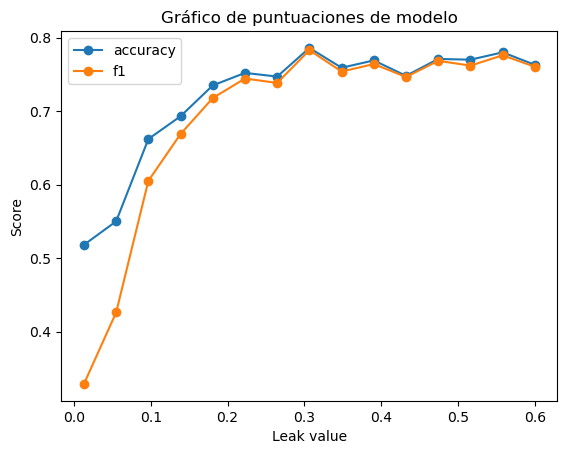

In [22]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()

##### Modelo multicapa

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_complete.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x = X_train_complete,
    y = y_train_complete,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

display(eval_dl_model(model))

,accuracy_score,f1_score,leak_detection_delay,leak_loss
0.013000,0.520,0.418886,0,0.000000
0.054929,0.539,0.476731,2,158.194286
0.096857,0.659,0.640674,1,139.474286
0.138786,0.717,0.728146,1,199.851429
0.180714,0.778,0.791745,0,0.000000
0.222643,0.782,0.801457,0,0.000000
0.264571,0.788,0.810376,1,380.982857
0.306500,0.821,0.840606,0,0.000000
0.348429,0.797,0.822086,0,0.000000
0.390357,0.810,0.834495,0,0.000000


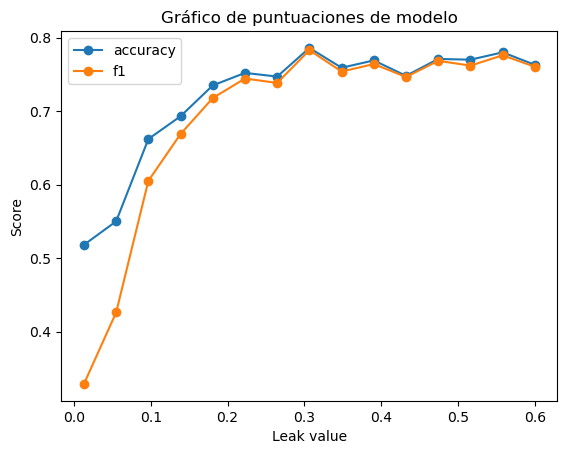

In [24]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()

#### Múltiples modelos de _Deep Learning_

In [25]:
result_dict = {}
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    leak_delay = leak_detection_delay(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    result_dict[leak_value] = (accuracy, f1, leak_delay)
    # model.save(f'../../pkl/models/{case}.keras')

display(pd.DataFrame.from_dict(
    data = result_dict,
    orient = 'index',
    columns = ['accuracy_score', 'f1_score', 'leak_detection_delay']
))

,accuracy_score,f1_score,leak_detection_delay
0.013000,0.581,0.608777,0
0.054929,0.646,0.658301,1
0.096857,0.705,0.739169,0
0.138786,0.633,0.541823,110
0.180714,0.707,0.753159,0
0.222643,0.549,0.682618,0
0.264571,0.625,0.647225,0
0.306500,0.662,0.552910,94
0.348429,0.664,0.698925,0
0.390357,0.728,0.740458,75


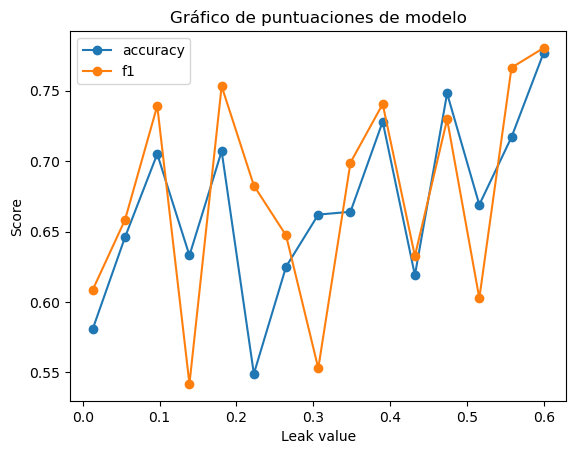

In [26]:
x_vals =    [float(key) for key in result_dict]
acc_vals =  [result_dict[key][0] for key in result_dict]
f1_vals =   [result_dict[key][1] for key in result_dict]

plt.plot(x_vals, acc_vals, label='accuracy', marker='o')
plt.plot(x_vals, f1_vals, label='f1', marker='o')

plt.xlabel('Leak value')
plt.ylabel('Score')

plt.title('Gráfico de puntuaciones de modelo')

plt.legend()

plt.show()